<a href="https://colab.research.google.com/github/mauriciozanotti85-ui/Clima/blob/main/ProyectoDSParteI%2BZanotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduccion**:

El proposito del siguiente trabajo es determinar si el exito de una cancion esta relacionado por una cancion mas instumental o por la duracion de la letra en la misma. Tambien se consideraran otros factores entre estas dos variables como si es mas bailable, sonoridad, acustica, etc.

El dataset proviene de la empresa de streaming Spotify, los mismos provienen de Kaggle disponiblen en el siguiente enlace: https://www.kaggle.com/datasets/purumalgi/music-genre-classification

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("purumalgi/music-genre-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'music-genre-classification' dataset.
Path to dataset files: /kaggle/input/music-genre-classification


In [47]:
import pandas as pd
import numpy as np
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)
df.head(20)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.000000,4,2
7,Randy Travis,On the Other Hand,55.0,0.657,0.415,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4
8,Professional Murder Music,Slow,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.061400,NaN,0.2530,0.8330,128.043,164093.000000,4,9


## **Descripción del Dataset:**

### Descripción de cada columna:

Artist Name : nombre del artista vinculado a cada tema músical.

Track Name : nombre del tema músical.

Popularity : Indica la popularidad de cada tema músical. Los valores son del 1 al 100.

danceability: el indice señala qué tan apta es una canción para bailar. Este valor se basa en una combinación de elementos musicales como el tiempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general. Los valores de danceability van de 0.0 (min bailable) hasta 1.0 (max bailable).

energy: nivel de energía de cada tema musical. Con valores del 0 al 1.

key : muestra el tono de cada tema. Con valores del 1 al 10.

loudness: medida de la sonoridad de una canción que tiene en cuenta la percepción humana y la intensidad de la señal eléctrica mode

speechiness: presencia de palabras habladas en el tema

acousticness : acousticness de una canción es una medida de confianza que indica si la pista es acústica, en una escala de 0,0 a 1,0. Un valor de 1,0 indica una alta confianza de que la pista es acústica.

instrumentalness: indica la relación entre la parte instrumental y la vocal de la canción. Los temas que tienen voz e instrumentos suelen tener un valor de instrumentalness entre 0.0 y 0.1.

liveness: indica la presencia de público en la grabación. Los valores de liveness más altos indican que es más probable que la canción se haya interpretado en vivo

valence :es la configuración de los niveles de tonos agudos y bajos que se puede ajustar con el ecualizado tempo

duration_in min/ms: duración de la canción

time_signature:es una convención de notación que indica la cantidad de golpes que hay en cada barra o medida. El rango de la time signature va de 3 a 7, indicando "3/4" a "7/4"

Class: es un código que indica el genero de la canción.

Genero: nombre del genero de la canción.

### **Exploracion de Datos:**

In [48]:
import pandas as pd
import numpy as np
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)
len(df)

17996

In [49]:
import pandas as pd
import numpy as np
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [50]:
df.describe().round(1)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.0,17996.0,17996.0,15982.0,17996.0,17996.0,17996.0,17996.0,13619.0,17996.0,17996.0,17996.0,17996.0,17996.0,17996.0
mean,44.5,0.5,0.7,6.0,-7.9,0.6,0.1,0.2,0.2,0.2,0.5,122.6,200744.5,3.9,6.7
std,17.4,0.2,0.2,3.2,4.0,0.5,0.1,0.3,0.3,0.2,0.2,29.6,111989.1,0.4,3.2
min,1.0,0.1,0.0,1.0,-40.0,0.0,0.0,0.0,0.0,0.0,0.0,30.6,0.5,1.0,0.0
25%,33.0,0.4,0.5,3.0,-9.5,0.0,0.0,0.0,0.0,0.1,0.3,99.6,166337.0,4.0,5.0
50%,44.0,0.5,0.7,6.0,-7.0,1.0,0.0,0.1,0.0,0.1,0.5,120.1,209160.0,4.0,8.0
75%,56.0,0.7,0.9,9.0,-5.2,1.0,0.1,0.4,0.2,0.3,0.7,142.0,252490.0,4.0,10.0
max,100.0,1.0,1.0,11.0,1.4,1.0,1.0,1.0,1.0,1.0,1.0,217.4,1477187.0,5.0,10.0


In [51]:
df.Popularity.unique()

array([ 60.,  54.,  35.,  66.,  53.,  48.,  55.,  29.,  14.,  11.,  59.,
        34.,  76.,  37.,  31.,  70.,  44.,  nan,  73.,  30.,  81.,   4.,
        49.,  42.,  16.,  47.,  63.,  65.,  56.,  28.,  77.,  18.,   9.,
        41.,  20.,  38.,  26.,  24.,  68.,  43.,  57.,  79.,  71.,  33.,
        45.,  13.,  51.,  62.,   3.,  25.,  22.,  40.,  19.,  50.,  52.,
        10.,  32.,  69.,   7.,  21.,  23.,  17.,  58.,  39.,  90.,  99.,
        75.,  46.,  64.,  72.,  78.,  15.,  27.,  61.,   8.,  67.,  83.,
        87.,  93.,  12.,  82.,  80.,   1.,  36.,  88.,  74.,   2.,   6.,
         5.,  86.,  89.,  98.,  84.,  91.,  85.,  95.,  92.,  94.,  96.,
        97., 100.])

In [52]:
df.danceability.unique()

array([0.854 , 0.382 , 0.434 , 0.853 , 0.167 , 0.235 , 0.674 , 0.657 ,
       0.431 , 0.716 , 0.491 , 0.387 , 0.585 , 0.462 , 0.653 , 0.713 ,
       0.564 , 0.57  , 0.852 , 0.347 , 0.796 , 0.805 , 0.472 , 0.556 ,
       0.548 , 0.867 , 0.341 , 0.733 , 0.696 , 0.517 , 0.437 , 0.384 ,
       0.858 , 0.297 , 0.516 , 0.32  , 0.661 , 0.569 , 0.357 , 0.615 ,
       0.479 , 0.633 , 0.618 , 0.881 , 0.624 , 0.607 , 0.799 , 0.494 ,
       0.52  , 0.595 , 0.523 , 0.566 , 0.612 , 0.63  , 0.521 , 0.501 ,
       0.185 , 0.532 , 0.415 , 0.425 , 0.373 , 0.39  , 0.439 , 0.827 ,
       0.709 , 0.583 , 0.704 , 0.247 , 0.801 , 0.539 , 0.907 , 0.667 ,
       0.436 , 0.366 , 0.777 , 0.54  , 0.435 , 0.288 , 0.562 , 0.683 ,
       0.411 , 0.49  , 0.374 , 0.593 , 0.809 , 0.748 , 0.529 , 0.543 ,
       0.644 , 0.467 , 0.514 , 0.381 , 0.762 , 0.576 , 0.61  , 0.117 ,
       0.86  , 0.766 , 0.697 , 0.407 , 0.744 , 0.545 , 0.266 , 0.645 ,
       0.508 , 0.579 , 0.426 , 0.449 , 0.698 , 0.691 , 0.58  , 0.565 ,
      

In [53]:
df.energy.unique()

array([0.564 , 0.814 , 0.614 , ..., 0.0773, 0.0995, 0.0835])

In [54]:
df.key.unique()

array([ 1.,  3.,  6., 10.,  2.,  5.,  7.,  9., 11.,  8., nan,  4.])

In [55]:
df.loudness.unique()

array([ -4.964,  -7.23 ,  -8.334, ..., -11.621, -25.131, -12.757])

In [56]:
df.speechiness.unique()

array([0.0485, 0.0406, 0.0525, ..., 0.44  , 0.52  , 0.49  ])

In [57]:
df.acousticness.unique()

array([1.71e-02, 1.10e-03, 4.86e-01, ..., 6.87e-04, 9.80e-05, 2.97e-05])

In [58]:
df.instrumentalness.unique()

array([     nan, 4.01e-03, 1.96e-04, ..., 6.58e-04, 7.51e-05, 8.39e-04])

In [59]:
df.liveness.unique()

array([0.0849, 0.101 , 0.394 , ..., 0.0522, 0.815 , 0.814 ])

In [60]:
df.valence.unique()

array([0.899 , 0.569 , 0.787 , ..., 0.0944, 0.0364, 0.0425])

In [61]:
import pandas as pd
import re
import os # Ensure os is imported

# --- 1. Cargar DataFrames ---
# Cargar train.csv
# Construct the full file path
file_path_train = os.path.join(path, 'train.csv')
# Load the CSV file into df_train using pd.read_csv
# Based on previous successful loading of 'df', the delimiter is likely ','
# and default encoding works, so explicit 'delimiter' and 'encoding' might not be needed.
df_train = pd.read_csv(file_path_train)

# Cargar submission.csv
# Construct the full file path for submission.csv
submission_file_path = os.path.join(path, 'submission.csv')
df_submission = pd.read_csv(submission_file_path)

# --- 2. Crear el Mapeo de CLASE a GÉNERO desde submission.csv ---
# Extraemos los nombres de las columnas que contienen la llave y el nombre del género
columnas_genero = df_submission.columns.tolist()

# Crear un diccionario y luego un DataFrame de mapeo
mapeo_genero = {}
for col in columnas_genero:
    # El patrón busca "Nombre_Genero" + "_" + "Numero_Clase"
    match = re.match(r'(.+)_(\d+)', col)
    if match:
        # Extraer el nombre del género y reemplazar guiones bajos por espacios
        genre_name = match.group(1).replace('_', ' ')
        # Extraer el número de clase
        class_number = int(match.group(2))
        mapeo_genero[class_number] = genre_name

# Convertir el diccionario a un DataFrame de mapeo (la tabla de referencia)
df_mapa = pd.DataFrame(
    list(mapeo_genero.items()),
    columns=['Class', 'Genre_Name']
)
df_mapa['Class'] = df_mapa['Class'].astype(int)


# --- 3. Vincular (Merge) el mapa al DataFrame de entrenamiento ---
# Limpiar y asegurar que la columna 'Class' en train.csv sea numérica/entera
# Use pd.to_numeric with errors='coerce' to handle non-numeric values, then drop NA and convert to int.
df_train['Class'] = pd.to_numeric(df_train['Class'], errors='coerce').dropna().astype(int)

# Realizar la unión LEFT: mantenemos todas las canciones de train.csv
# y añadimos la columna 'Genre_Name' usando 'Class' como llave.
df_train_merged = pd.merge(
    left=df_train,
    right=df_mapa,
    on='Class',
    how='left'
)

# --- 4. Mostrar el Resultado ---
print("--- Vinculación Exitosa (Primeras 5 Filas) ---")
print(df_train_merged[['Artist Name', 'Track Name', 'Class', 'Genre_Name', 'Popularity']].head().to_markdown(index=False))

--- Vinculación Exitosa (Primeras 5 Filas) ---
| Artist Name           | Track Name                            |   Class | Genre_Name   |   Popularity |
|:----------------------|:--------------------------------------|--------:|:-------------|-------------:|
| Bruno Mars            | That's What I Like (feat. Gucci Mane) |       5 | HipHop       |           60 |
| Boston                | Hitch a Ride                          |      10 | Rock         |           54 |
| The Raincoats         | No Side to Fall In                    |       6 | Indie Alt    |           35 |
| Deno                  | Lingo (feat. J.I & Chunkz)            |       5 | HipHop       |           66 |
| Red Hot Chili Peppers | Nobody Weird Like Me - Remastered     |      10 | Rock         |           53 |


In [62]:
# Agrupar por género y calcular la media de popularidad, danzabilidad y duración
grouped_df = df_train_merged.groupby('Genre_Name').agg({'Popularity': 'mean', 'speechiness': 'mean', 'instrumentalness': 'mean'})

# Mostrar el resultado
grouped_df

,Popularity,speechiness,instrumentalness
Genre_Name,,,
Acoustic/Folk,38.105263,0.043510,0.099464
Alt Music,45.883185,0.067848,0.199239
Blues,32.911695,0.061240,0.097938
Bollywood,26.242268,0.078229,0.131430
Country,57.294278,0.041906,0.012675
HipHop,48.638596,0.232698,0.068779
Indie Alt,41.474843,0.067378,0.262643
Instrumental,41.506399,0.045550,0.740386
Metal,42.226674,0.088745,0.235927


### **Hipotesis Planteadas:**



1.   Los dos generos mas populares de musica son Country y Pop. Muy cerca esta el Hip Hoo y el Rock.
2.   No existe una relacion entre las variables speechiness e instrumentalness. Entre la variable Popularity e instrumentalness existe una relacion inversa, cuanto mas popular sea el genero menos instumental es el genero. En cuanto a la variable speechiness y Popularity no se observa relacion ni inversa ni directa.
3.   Se observo que el Hip Hop es el genero que mas speechhiness tiene, siendo el tercer genero mas popular.



/tmp/ipython-input-44791390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre_Name', y='Popularity', data=df_train_merged, palette='Pastel1')


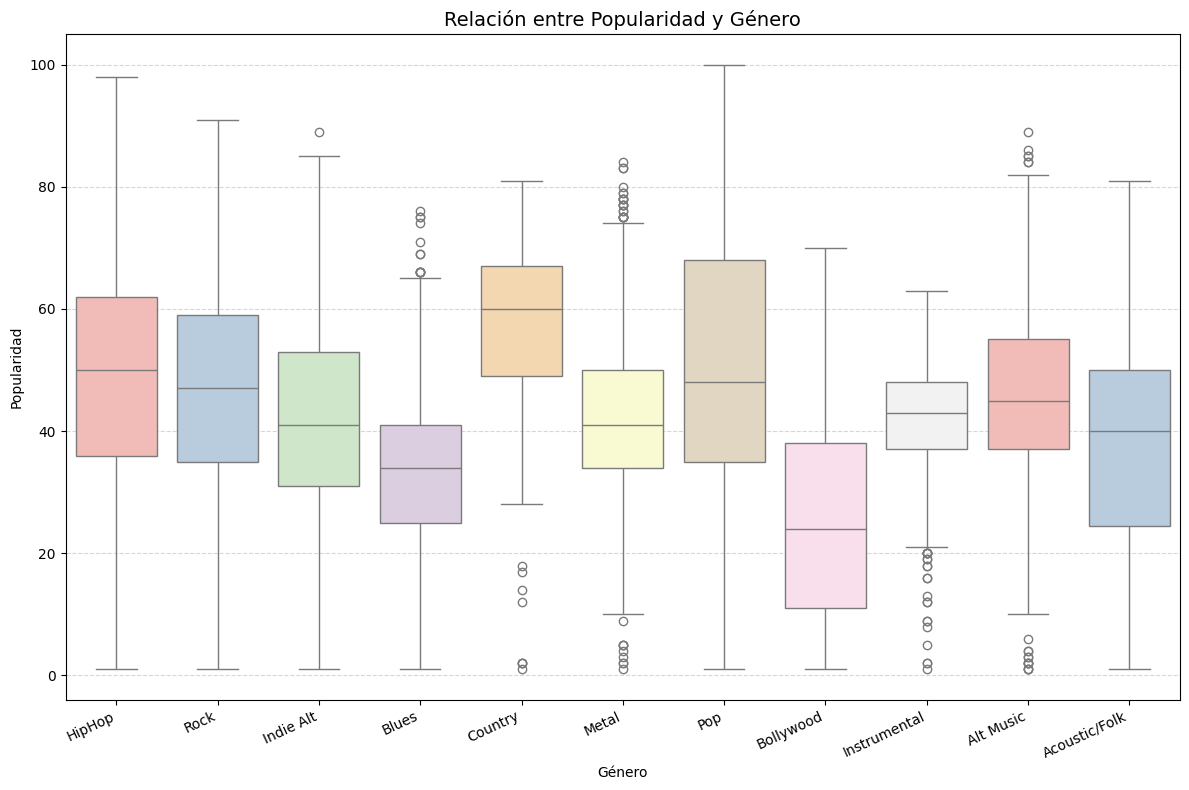

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre_Name', y='Popularity', data=df_train_merged, palette='Pastel1')
plt.title('Relación entre Popularidad y Género', fontsize=14)
plt.xlabel('Género', fontsize=10)
plt.ylabel('Popularidad', fontsize=10)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Popularidad por Generos:**

**1. Popularidad promedio (mediana):** al observar la línea central de cada boxplot los géneros con mayor mediana de popularidad:

+Country

+Pop

+Alt Music

Estos géneros muestran una popularidad promedio más alta, la mayoría de sus canciones alcanzan valores relativamente elevados.

**2. Géneros de popularidad media:**

+HipHop

+Rock

+Indie Alt

+Acoustic/Folk

+Metal

Estos generos de moderadas medianas y distribuciones muy amplias, indica en el grafico mucha variabilidad (pueden ser muy porpulares o todo lo contrario)

**3. Variabilidad (dispersión)**
Los generos como el Rock, HipHop, Indie Alt, Metal, Alt Music, Acoustic/Folk
muestran rangos muy amplios, dentro del género hay tanto canciones poco populares como muy exitosas. Todo lo contrario con Instrumental, las canciones tienen niveles de popularidad parecidos.

**4. Outliers (canciones excepcionalmente populares)**

En su mayoria los géneros tienen outliers altos, llegando cerca de 100.

Esto indica que todos los géneros, incluso los de menor mediana, tienen la capacidad de producir canciones extremadamente exitosas.



Using Colab cache for faster access to the 'music-genre-classification' dataset.


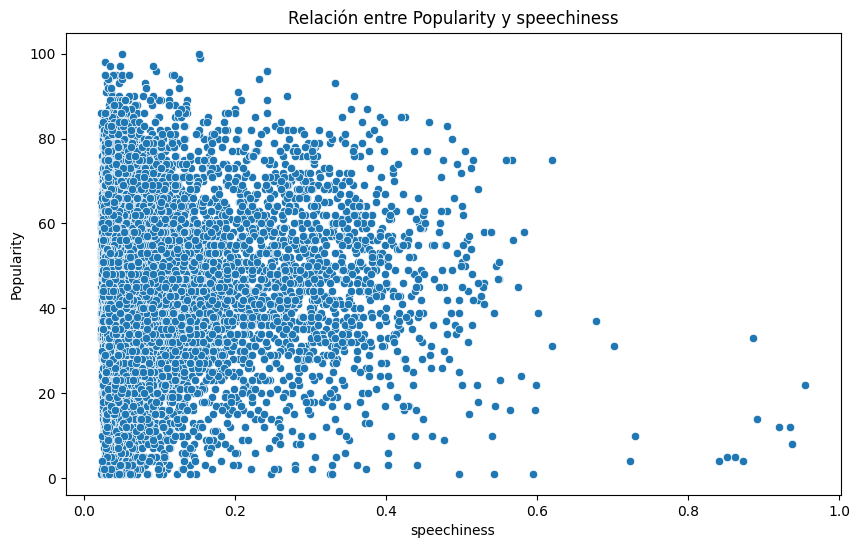

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import kagglehub

path = kagglehub.dataset_download("purumalgi/music-genre-classification")

file_path_train = os.path.join(path, 'train.csv')
df_train = pd.read_csv(file_path_train)

submission_file_path = os.path.join(path, 'submission.csv')
df_submission = pd.read_csv(submission_file_path)

columnas_genero = df_submission.columns.tolist()
mapeo_genero = {}
for col in columnas_genero:
    match = re.match(r'(.+)_(\d+)', col)
    if match:
        genre_name = match.group(1).replace('_', ' ')
        class_number = int(match.group(2))
        mapeo_genero[class_number] = genre_name

df_mapa = pd.DataFrame(
    list(mapeo_genero.items()),
    columns=['Class', 'Genre_Name']
)
df_mapa['Class'] = df_mapa['Class'].astype(int)

df_train['Class'] = pd.to_numeric(df_train['Class'], errors='coerce').dropna().astype(int)
df_train_merged = pd.merge(
    left=df_train,
    right=df_mapa,
    on='Class',
    how='left'
)
df = df_train_merged.copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='speechiness', y='Popularity')
plt.title('Relación entre Popularity y speechiness')
plt.xlabel('speechiness')
plt.ylabel('Popularity')
plt.show()

Menos indicie de speechiness mas popularidad tiene la cancion.

In [65]:
correlation_coefficient = df['speechiness'].corr(df['Popularity'])

print(f"The correlation coefficient between speechiness and popularity is: {correlation_coefficient}")

The correlation coefficient between speechiness and popularity is: 0.031663822975772825


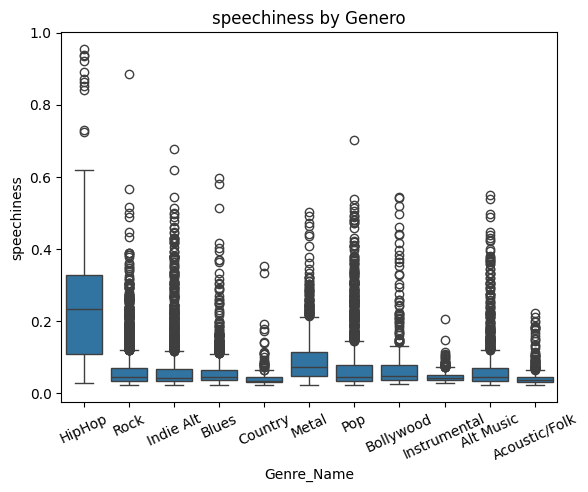

In [66]:
import seaborn as sns

sns.boxplot(x='Genre_Name', y='speechiness', data=df)
plt.xlabel('Genre_Name')
plt.ylabel('speechiness')
plt.title('speechiness by Genero')
plt.xticks(rotation=25)
plt.show()

El HipHop es el único género con speechiness claramente mayor y distribuido más ampliamente. El resto de los generos musicales tienen un nivel bajo de contenido de voz, concentrados mas en la melodia. Tambien se puede visualizar la presencia de muchos valores atipicos.

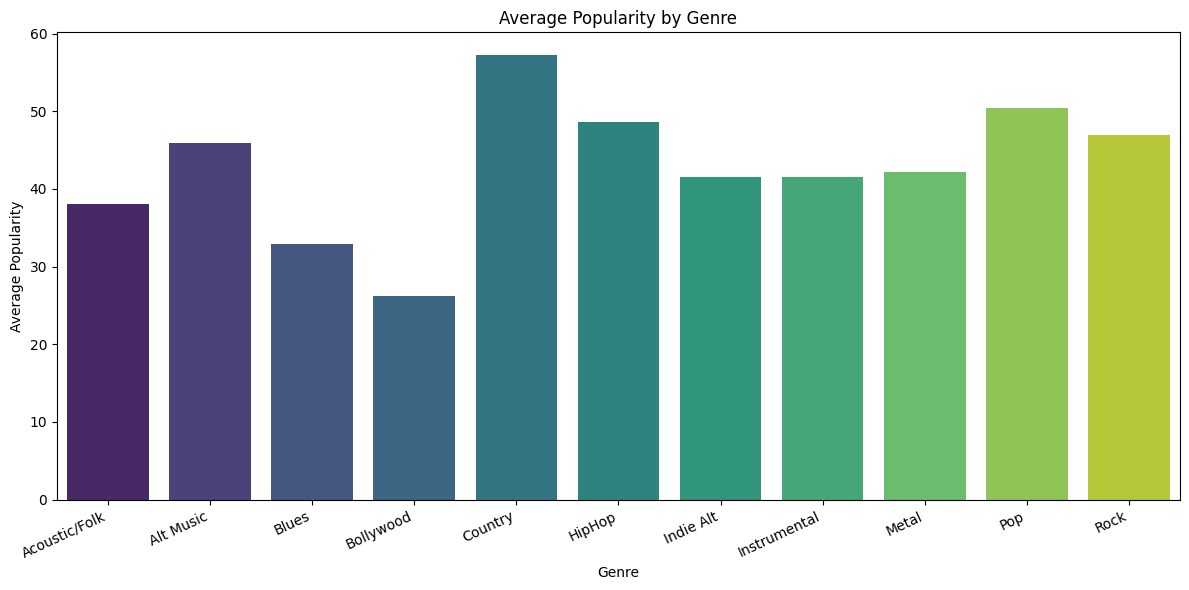

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

average_popularity_by_genre = df.groupby('Genre_Name')['Popularity'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_popularity_by_genre.index, y=average_popularity_by_genre.values, hue=average_popularity_by_genre.index, palette='viridis', legend=False)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

La musica Country posee la mayor popularidad promedio, en comparacion con los demas generos, seguidos por el Pop y Rock.

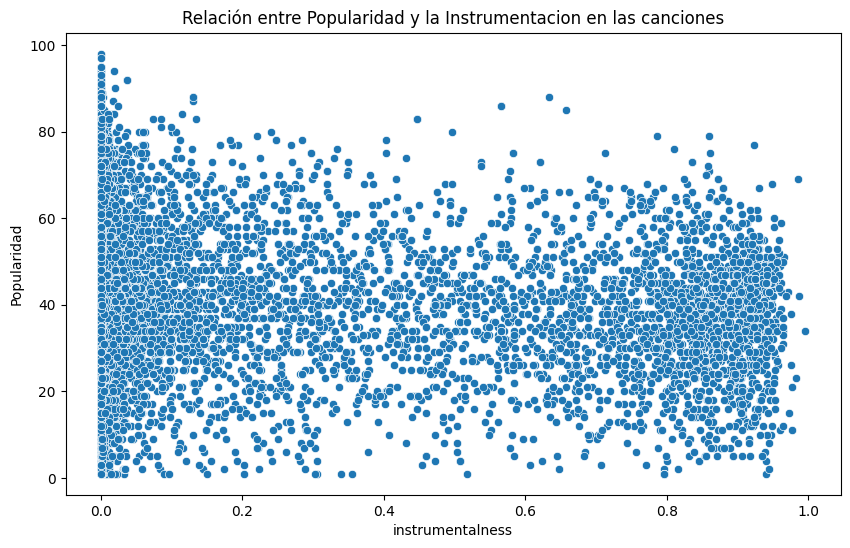

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='instrumentalness', y='Popularity')
plt.title('Relación entre Popularidad y la Instrumentacion en las canciones')
plt.xlabel('instrumentalness')
plt.ylabel('Popularidad')
plt.show()

No se observa una relacion lineal clara entre Instrumental y Popularidad de una cancion. Las canciones Instrumentales en cuanto a su Popularidad no depende significativamente de una cancion sea menos o mas instrumental. En valores altos de instrumentalness (≥ 0.8), hay menos puntos, indicando aunque pocas canciones son totalmente instrumentales, algunas alcanzan buena popularidad.

In [69]:

correlation_coefficient = df['Popularity'].corr(df['instrumentalness'])

print(f"The correlation coefficient between popularity and instrumentalness is: {correlation_coefficient}")

The correlation coefficient between popularity and instrumentalness is: -0.16766106446827464


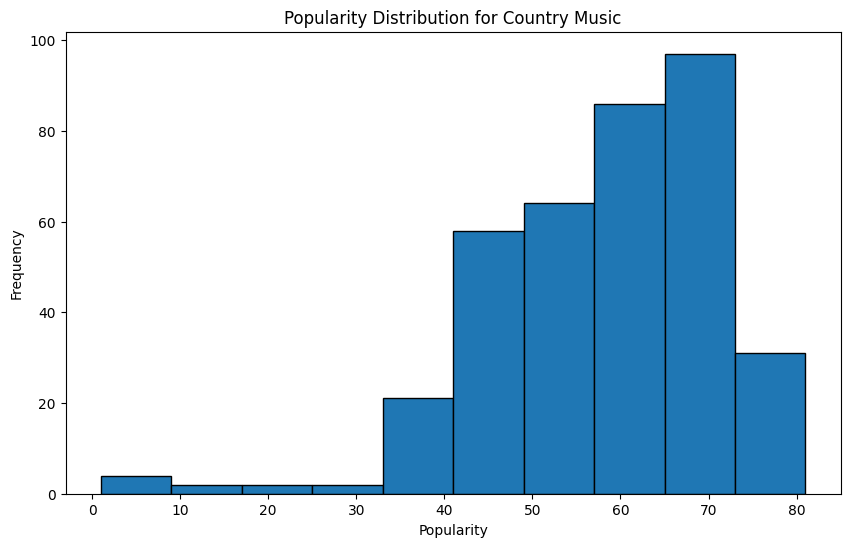

In [70]:
Country_df = df[df['Genre_Name'] == 'Country']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(Country_df['Popularity'], bins=10, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Country Music')
plt.show()

El Genero Country posee una popularidad aprox los 32-72 puntos

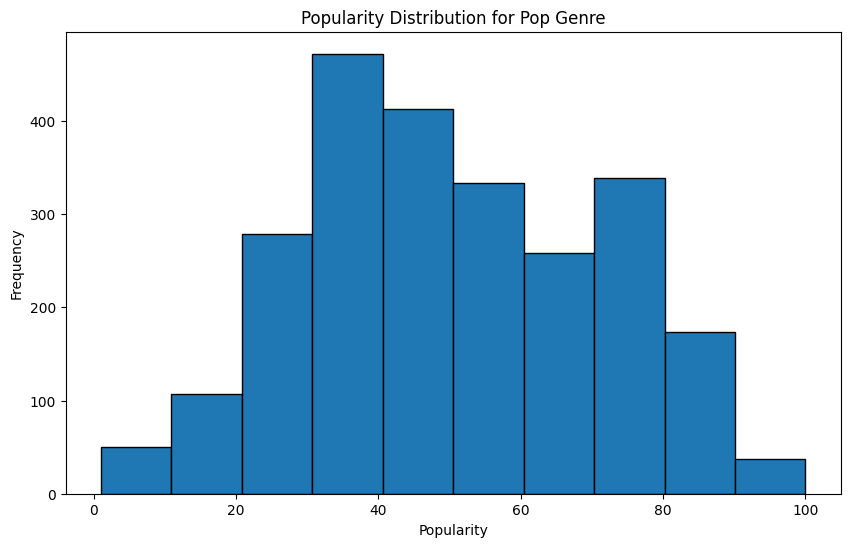

In [71]:
pop_9_df = df[df['Genre_Name'] == 'Pop']

plt.figure(figsize=(10, 6))
plt.hist(pop_9_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Pop Genre')
plt.show()

La mayoria de las canciones Pop posee una popularidad entre los 20 y 90

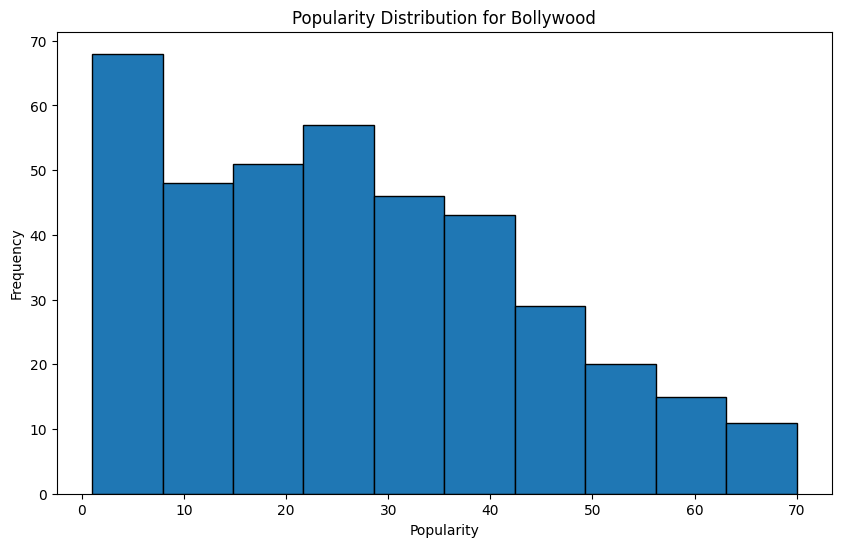

In [72]:
pop_9_df = df[df['Genre_Name'] == 'Bollywood']

plt.figure(figsize=(10, 6))
plt.hist(pop_9_df['Popularity'], bins=10, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Bollywood')
plt.show()

En el caso de la musica de Bollywood posee una popularidad que va de 0 hasta algunos casos por encima de 60. Con estas graficas se puede obser que la musica country presenta valores por encima de los 32 puntos promedio de popularidad.